<a href="https://colab.research.google.com/github/bchanyoo/NLP/blob/main/NLP%20Wikidocs_IrisData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [6]:
data = pd.read_csv('/content/sample_data/Iris.csv')

print('샘플의 개수 :', len(data))
print(data[:5])
#6개의 열로 구성된 150개의 sample로 구성돼 있다.

샘플의 개수 : 150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [9]:
print('품종 종류', data['Species'].unique()) #unique는 중복값 제거후 반환

품종 종류 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


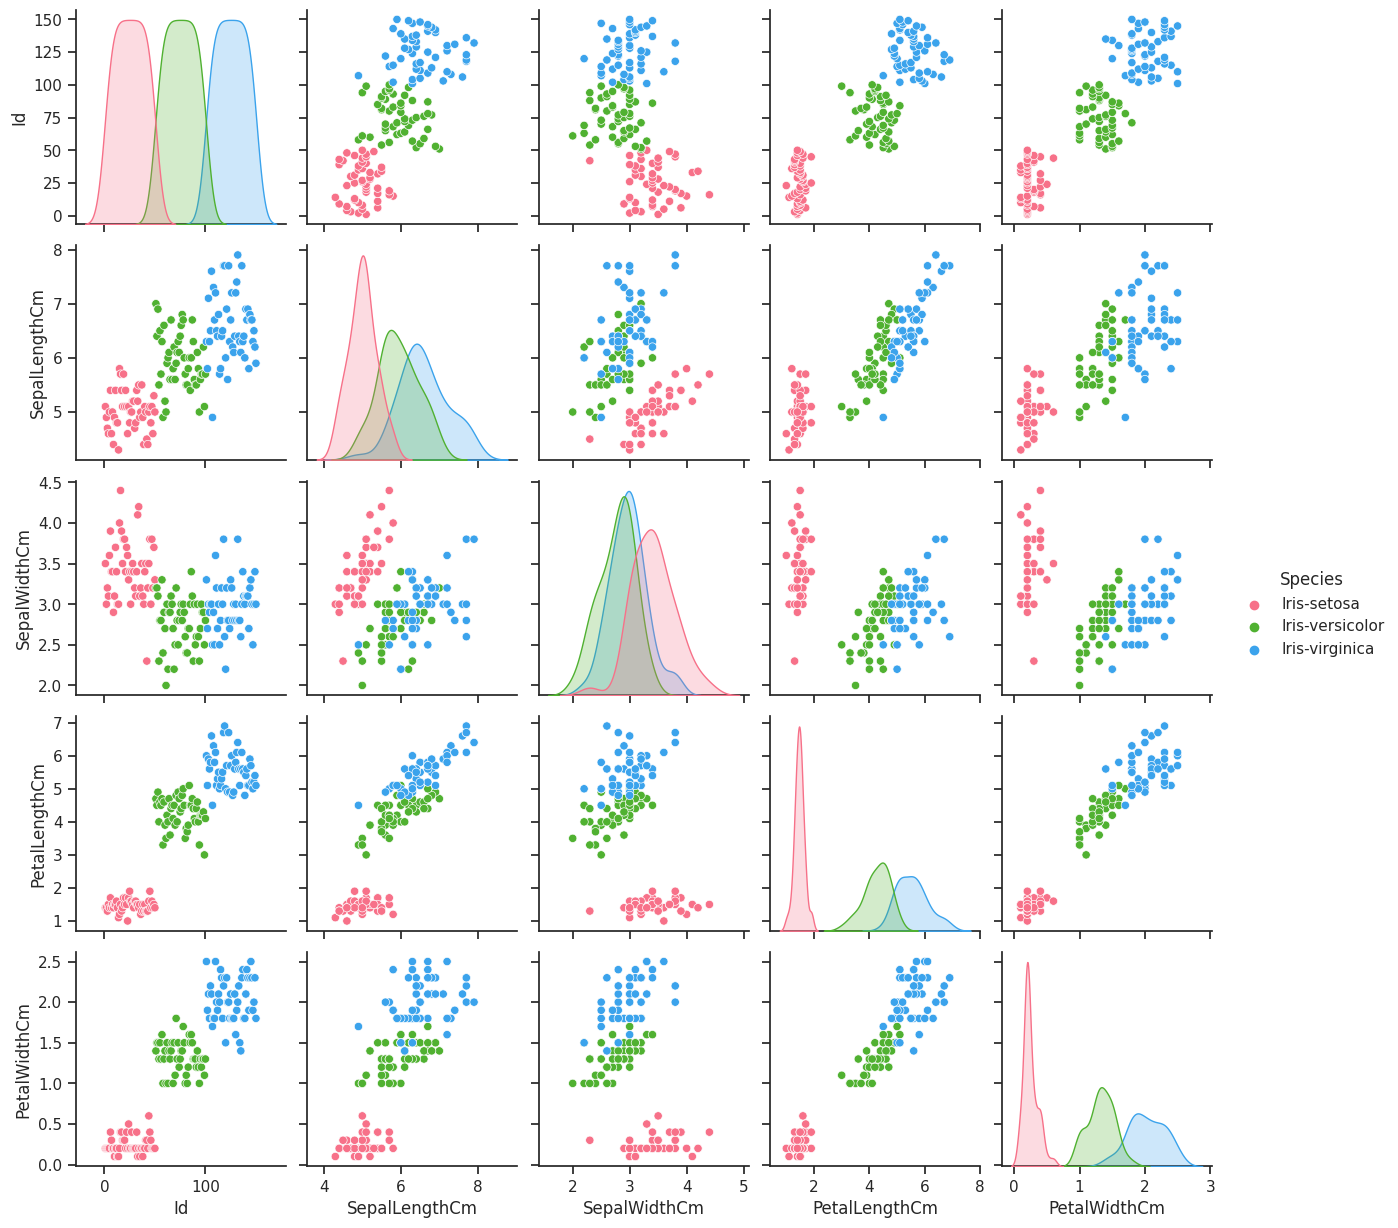

In [10]:
#4개의 특성으로부터 3개 중 어떤 품종일지를 예측하는 문제.

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")

<Axes: >

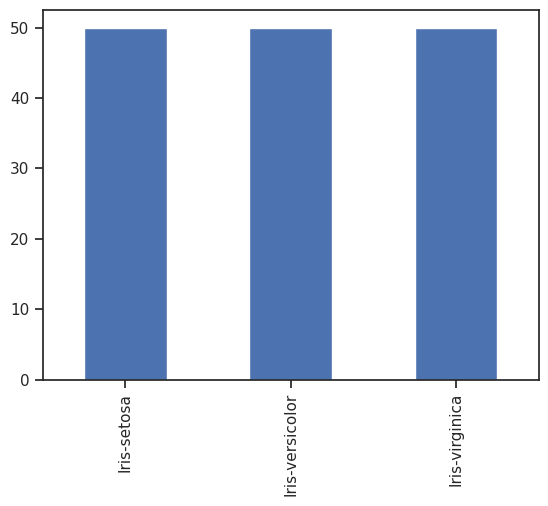

In [17]:
#150개 데이터 중에서 species에 각각 몇개가 있는지 확인하기.

data['Species'].value_counts().plot(kind='bar')

<Axes: >

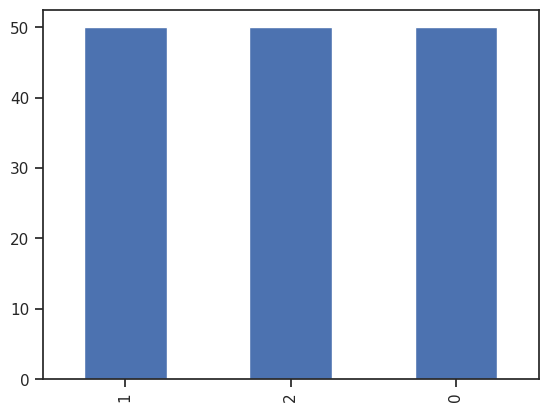

In [19]:
#softmax 회귀 모델을 구성하기 위해 정수 인코딩 수행하기.
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])
data['Species'].value_counts().plot(kind = 'bar')

In [21]:
# 특성과 품종을 각각 종속 변수와 독립 변수 데이터로 분리하기.

# X 데이터. 특성은 총 4개.
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Y 데이터. 예측 대상.
data_y = data['Species'].values

print(data_X[:5])
print('----------')
print(data_y[:5])


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
----------
[1 1 1 1 1]


In [23]:
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size = 0.8, random_state = 1)

#OneHot Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print('----------')
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
----------
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [26]:
#소프트맥스 회귀 구현해보기
#입력 차원이 4(sample), 출력 차원이 3(species)
#활성화 함수는 softmax
#오차 함수는 categorical_crossentropy
#optimizer = adam (나중에 다룰 것)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(3, input_dim = 4, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 200, batch_size = 1, validation_data = (X_test, y_test))

#accuracy = 훈련 데이터에 대한 정확도
#val_accuracy = 테스트 데이터에 대한 정확도

Epoch 1/200
120/120 [==============================] - 2s 4ms/step - loss: 2.5104 - accuracy: 0.2167 - val_loss: 2.6274 - val_accuracy: 0.0333
Epoch 2/200
120/120 [==============================] - 0s 2ms/step - loss: 2.1376 - accuracy: 0.2500 - val_loss: 2.2047 - val_accuracy: 0.1333
Epoch 3/200
120/120 [==============================] - 0s 2ms/step - loss: 1.7772 - accuracy: 0.3167 - val_loss: 1.8020 - val_accuracy: 0.1333
Epoch 4/200
120/120 [==============================] - 0s 2ms/step - loss: 1.4337 - accuracy: 0.3417 - val_loss: 1.3908 - val_accuracy: 0.1333
Epoch 5/200
120/120 [==============================] - 0s 2ms/step - loss: 1.1322 - accuracy: 0.2583 - val_loss: 1.0674 - val_accuracy: 0.2000
Epoch 6/200
120/120 [==============================] - 0s 2ms/step - loss: 0.8885 - accuracy: 0.3750 - val_loss: 0.8712 - val_accuracy: 0.2667
Epoch 7/200
120/120 [==============================] - 0s 2ms/step - loss: 0.7469 - accuracy: 0.6250 - val_loss: 0.7190 - val_accuracy: 0.5667

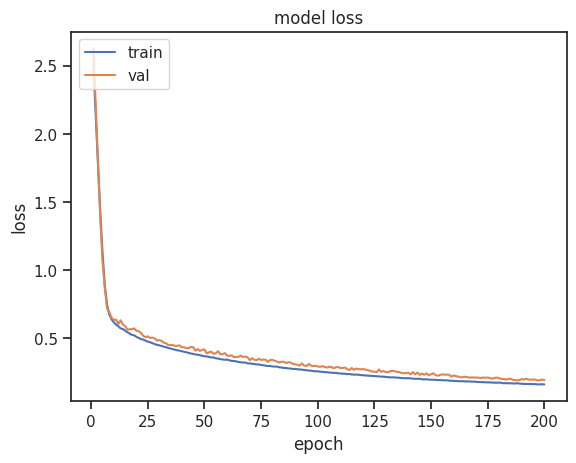

In [27]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 1s 588ms/step - loss: 0.1904 - accuracy: 1.0000

 테스트 정확도: 1.0000
